In [ ]:
import tensorflow as tf
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mping

print(tf.__version__)

2.9.2


**Data Preprocessing**

In [ ]:
mnist= tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


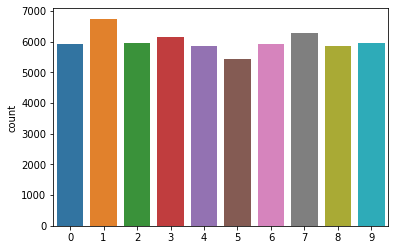

In [ ]:
sns.countplot(y_train)

**CHECK OF NaN VALUES**

In [ ]:
np.isnan(x_train).any()

False

In [ ]:
np.isnan(x_test).any()

False

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
x_test.shape

(10000, 28, 28)

**NORMALIZATION AND RESHAPING**

In [ ]:
input_shape=(28,28,1)
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1],x_train.shape[2],1)
x_train=x_train/255.0
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1],x_test.shape[2],1)
x_test=x_test/255.0

In [ ]:
x_test.shape

(10000, 28, 28, 1)

**LABEL ENCODING**

In [ ]:
y_train=tf.one_hot(y_train.astype(np.int32),depth=10)
y_test=tf.one_hot(y_test.astype(np.int32),depth=10)

In [ ]:
y_train

<tf.Tensor: shape=(60000, 10), dtype=float32, numpy=
array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)>

In [ ]:
y_test

<tf.Tensor: shape=(10000, 10), dtype=float32, numpy=
array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)>

**DATA VISUALIZE**

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>

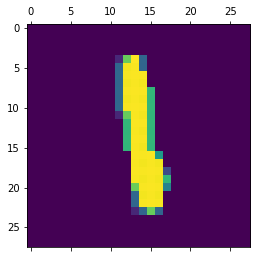

In [ ]:
plt.matshow(x_train[200][:,:,0])
y_train[200]

**CNN**

In [ ]:
batch_size=64
num_classes=10
epochs=3

In [ ]:
#padding=> input shape= output shape
model=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,(5,5),padding='same',activation='relu',input_shape=input_shape), 
    tf.keras.layers.Conv2D(32,(5,5),padding='same',activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(64,(3,3),padding='same',activation='relu'),
   tf.keras.layers.Conv2D(64,(3,3),padding='same',activation='relu'),
   tf.keras.layers.MaxPool2D(strides=(2,2)),
   tf.keras.layers.Dropout(0.25),
   tf.keras.layers.Flatten(),
   tf.keras.layers.Dense(128,activation='relu'),
   tf.keras.layers.Dropout(0.5),
   tf.keras.layers.Dense(num_classes,activation='softmax')
])
model.compile(optimizer=tf.keras.optimizers.RMSprop(epsilon=1e-08),loss='categorical_crossentropy',metrics=['acc'])

**Fit the training data**

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs={}):
    if(logs.get('acc')>0.995):
      print("\nReached 99.5% accuracy so cancelling training")
      self.model.stop_training=True

callbacks=myCallback()

In [ ]:
history = model.fit(x_train,y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_split=0.1,
                    callbacks=[callbacks]
                    )

Epoch 1/3
844/844 [==============================] - 17s 10ms/step - loss: 0.2198 - acc: 0.9311 - val_loss: 0.0438 - val_acc: 0.9870
Epoch 2/3
844/844 [==============================] - 8s 10ms/step - loss: 0.0754 - acc: 0.9787 - val_loss: 0.0337 - val_acc: 0.9907
Epoch 3/3
844/844 [==============================] - 6s 7ms/step - loss: 0.0606 - acc: 0.9828 - val_loss: 0.0466 - val_acc: 0.9873


**EVALUATION**

**LOSS and ACCURACY CURVE**

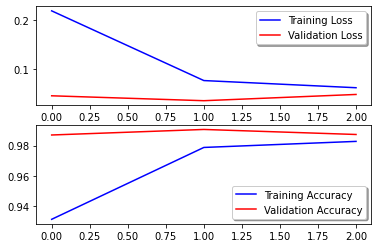

In [ ]:
fig,ax=plt.subplots(2,1)
ax[0].plot(history.history['loss'],color='b',label='Training Loss')
ax[0].plot(history.history['val_loss'],color='r',label='Validation Loss',axes=ax[0])
legend=ax[0].legend(loc='best',shadow=True)

ax[1].plot(history.history['acc'],color='b',label='Training Accuracy')
ax[1].plot(history.history['val_acc'],color='r',label='Validation Accuracy')
legend=ax[1].legend(loc='best',shadow=True)




In [ ]:
test_loss,test_acc=model.evaluate(x_test,y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.0436 - acc: 0.9869


In [ ]:
#predict the values from testing dataset
Y_pred=model.predict(x_test)
Y_pred
#COnvert predictions classes to one hot vectors
Y_pred_classes=np.argmax(Y_pred,axis=1)

#Convert testing observations to one hot vectors
Y_true=np.argmax(y_test,axis=1 )
#compute confusion matrix
confusion_matrix =tf.math.confusion_matrix(Y_true,Y_pred_classes)

313/313 [==============================] - 1s 3ms/step


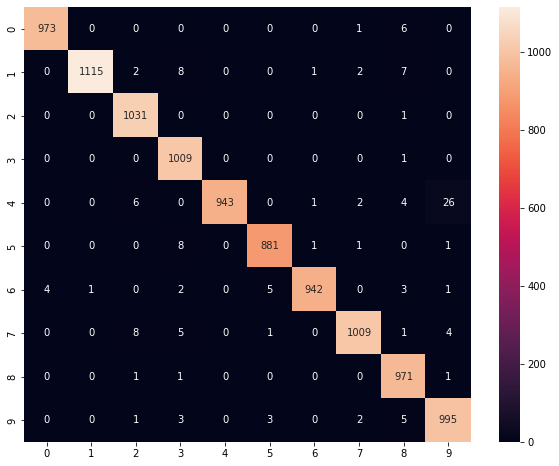

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix,annot=True,fmt='g')


In [ ]:
Y_pred

array([[1.25539232e-10, 1.71216659e-08, 4.70583643e-07, ...,
        9.99998093e-01, 3.78872134e-09, 7.86528176e-07],
       [3.84156522e-07, 3.98880587e-07, 9.99998212e-01, ...,
        1.06788027e-08, 5.74437031e-08, 2.29458466e-10],
       [1.20712466e-04, 9.92442608e-01, 9.90644447e-04, ...,
        1.42402831e-03, 1.50825642e-03, 4.08434134e-04],
       ...,
       [1.63050105e-15, 7.13207582e-09, 9.62051879e-12, ...,
        3.27227911e-09, 6.53082282e-08, 3.00736843e-07],
       [5.90554716e-10, 4.16667187e-11, 3.93564955e-12, ...,
        4.28827557e-10, 3.86735192e-05, 1.15736478e-08],
       [9.39909114e-07, 9.06907900e-08, 2.75305069e-07, ...,
        1.15116302e-11, 3.37896313e-06, 2.17590101e-09]], dtype=float32)

In [ ]:
Y_pred_classes


array([7, 2, 1, ..., 4, 5, 6])

In [ ]:
Y_true

array([7, 2, 1, ..., 4, 5, 6])